In [1]:
# modelo de espectro
# I0(Ei) = <espectro de fundo + Ka e Kb>(Ei)*<atenuação do caminho>(Ei,L)*<eficiencia do argonio>(Ei)
# Intensidade de cobre (I0) = Soma(Ei) do modelo(I0)
# Espectro final = Nfótons * ( Ei*Intensidade(Ei) + 8.9*<Itensidade de cobre>

import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import quad
import matplotlib.pyplot as plt

def read_xcom(filename):
    data = np.loadtxt(filename, skiprows=1)
    E = data[:, 0]
    mu_rho = data[:, 1]
    return E, mu_rho

def mu_rho_interpolator(E, mu_rho):
    return interp1d(E, mu_rho, kind='linear', fill_value="extrapolate")


def gauss(x, mu, sigma):
    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def Intensity_normalized(E, Emax, sigma, kalpha, kbeta, amp):
    intensidade = (E * (Emax - E))*np.log(Emax/E)+ amp*gauss(E, kalpha, sigma) + (amp*(16/100))*gauss(E, kbeta, sigma)
    normalization = quad(lambda E: (E * (Emax - E)) + amp*gauss(E, kalpha, sigma) + amp*gauss(E, kbeta, sigma), 0, Emax)[0]
    max = np.max(intensidade)
    return (1/max)*intensidade

def Intensity(E, Emax, sigma, kalpha, kbeta, amp):
    return (E * (Emax - E))*np.log(Emax/E)+ amp*gauss(E, kalpha, sigma) + (amp*(16/100))*gauss(E, kbeta, sigma)

def attenuation(E, mu_rho_interp, density, thickness):
    mu_rho = mu_rho_interp(E)
    return np.exp(-mu_rho * density * thickness)

def cobre_intensity(I0, lamba_ar, lambda_cu,):

    return I0 * (1 - np.exp(-mu_rho * cu_density * cu_thickness))




NameError: name 'D' is not defined

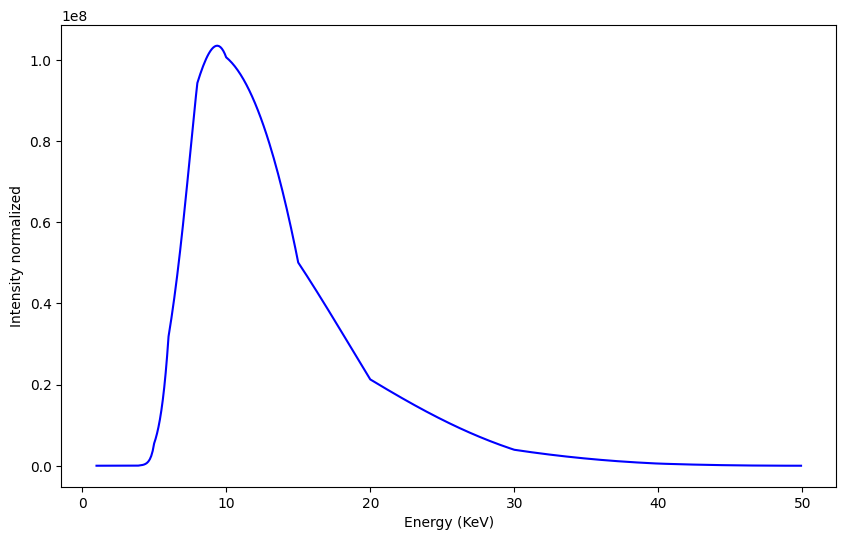

In [6]:
# Energy range from 1 keV to 50 keV
Emax = 50e3
sigma = 0.25e3
kalpha = 22.1e3
kbeta = 24.9e3
airdensity = 0.001225  # g/cm^3
airLenght = 100  # cm
amp = 0.5e-1
E = np.arange(1e3, 50e3, 100)
argondensity = 0.00166  # g/cm^3
argonLength = 3 # cm

I = Intensity(E, Emax, sigma, kalpha, kbeta,amp)
att_air = attenuation(E*1e-6,mu_rho_interpolator(*read_xcom('attenuation.txt')), airdensity, airLenght)
argon_eff = (1-attenuation(E*1e-6,mu_rho_interpolator(*read_xcom('attenuation_argon.txt')),argondensity, argonLength))

I = np.array(I*att_air*argon_eff)
plt.figure(figsize=(10, 6))
plt.plot(E*1e-3, I, label='Intensity Spectrum', color='blue')
plt.xlabel('Energy (KeV)')
plt.ylabel('Intensity normalized')
plt.title(f'X-ray Intensity Spectrum - Drift regio {D} cm ')
plt.legend()
plt.grid()
plt.show()


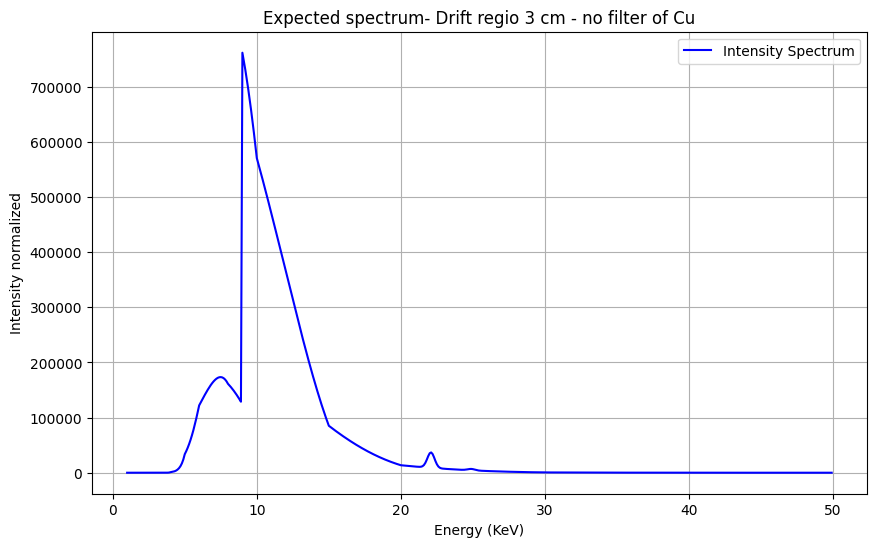

In [4]:
w = 0.433
cu_density = 8.96  # g/cm^3
argondensity = 0.00166  # g/cm^3

# Energy range from 1 keV to 50 keV
Emax = 50e3
sigma = 0.25e3
kalpha = 22.1e3
kbeta = 24.9e3
airdensity = 0.001225  # g/cm^3
airLenght = 100  # cm
amp = 5*1e-2
E = np.arange(1e3, 50e3, 100)
argondensity = 0.00166  # g/cm^3
argonLength = 3 # cm

# sem filtro de cobre na saída do tubo de raios-X
I = Intensity(
    E, Emax, sigma, kalpha, kbeta,amp = 1e12)*attenuation(
    E*1e-6,mu_rho_interpolator(*read_xcom('attenuation.txt')), airdensity, airLenght)*(1-attenuation(
    E*1e-6,mu_rho_interpolator(*read_xcom('attenuation_argon.txt')),argondensity, argonLength))

a = (1/(mu_rho_interpolator(*read_xcom('attenuation_copper.txt'))(E*1e-6) * cu_density))**(-1) #attenuação do cobre
b = 1/(mu_rho_interpolator(*read_xcom('attenuation_copper.txt'))(8.9e-6) * cu_density)**(-1) #atenuação do cobre no pico de Kα
c = 1/(mu_rho_interpolator(*read_xcom('attenuation_argon.txt'))(E*1e-6) * argondensity)**(-1) #atenuação do argonio
d = 5e-4 #espessura do cobre em cm
D = argonLength

Ik = np.zeros(len(I))
for Ei in range(len(I)):
    Ik[Ei] = 0.5*w*I[Ei]*quad(lambda theta: np.sin(theta)*(a[Ei]/(a[Ei] + b*np.cos(theta)))*(1 - np.exp(-d*(a[Ei] + b*np.cos(theta))))*(1- np.exp(-D*c[Ei]/np.cos(theta))), 0, np.pi/2)[0]
Itotal = np.sum(Ik)

plt.figure(figsize=(10, 6))
plt.plot(E*1e-3, Ik, label='Intensity Spectrum', color='blue')
plt.xlabel('Energy (KeV)')
plt.ylabel('Intensity normalized')
plt.title(f'Expected spectrum- Drift regio {D} cm - no filter of Cu')
plt.legend()
plt.grid()
plt.show()


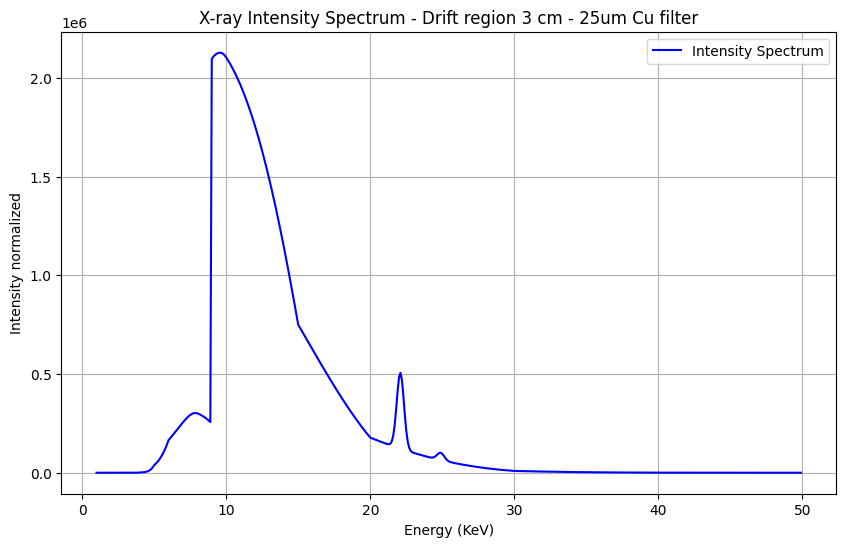

In [20]:
w = 0.433
cu_density = 8.96  # g/cm^3
argondensity = 0.00166  # g/cm^3

# Energy range from 1 keV to 50 keV
Emax = 50e3
sigma = 0.25e3
kalpha = 22.1e3
kbeta = 24.9e3
airdensity = 0.001225  # g/cm^3
airLenght = 100  # cm
amp = 5*1e-2
E = np.arange(1e3, 50e3, 100)
argondensity = 0.00166  # g/cm^3
argonLength = 3 # cm

I = Intensity(
    E, Emax, sigma, kalpha, kbeta,amp=1e12)*attenuation(
    E*1e-6,mu_rho_interpolator(*read_xcom('attenuation.txt')), airdensity, airLenght)*(1-attenuation(
    E*1e-6,mu_rho_interpolator(*read_xcom('attenuation_argon.txt')),argondensity, argonLength)*attenuation(
    E*1e-6,mu_rho_interpolator(*read_xcom('attenuation_copper.txt')),cu_density, 25e-4))

a = 1/(mu_rho_interpolator(*read_xcom('attenuation_copper.txt'))(E*1e-6) * cu_density)**(-1) #attenuação do cobre
b = 1/(mu_rho_interpolator(*read_xcom('attenuation_copper.txt'))(8.9e-6) * cu_density)**(-1) #atenuação do cobre no pico de Kα
c = 1/(mu_rho_interpolator(*read_xcom('attenuation_argon.txt'))(E*1e-6) * argondensity)**(-1) #atenuação do argonio
d = 5e-4 #espessura do cobre em cm
D = argonLength

Ik_copper = np.zeros(len(I))
for Ei in range(len(I)):
    Ik_copper[Ei] = 0.5*w*I[Ei]*quad(lambda theta: np.sin(theta)*(a[Ei]/(a[Ei] + b*np.cos(theta)))*(1 - np.exp(-d*(a[Ei] + b*np.cos(theta))))*(1- np.exp(-D*c[Ei]/np.cos(theta))), 0, np.pi/2)[0]



plt.figure(figsize=(10, 6))
plt.plot(E*1e-3, Ik_copper, label='Intensity Spectrum', color='blue')
plt.xlabel('Energy (KeV)')
plt.ylabel('Intensity normalized')
plt.title(f'X-ray Intensity Spectrum - Drift region {D} cm - 25um Cu filter')
plt.legend()
plt.grid()
plt.show()

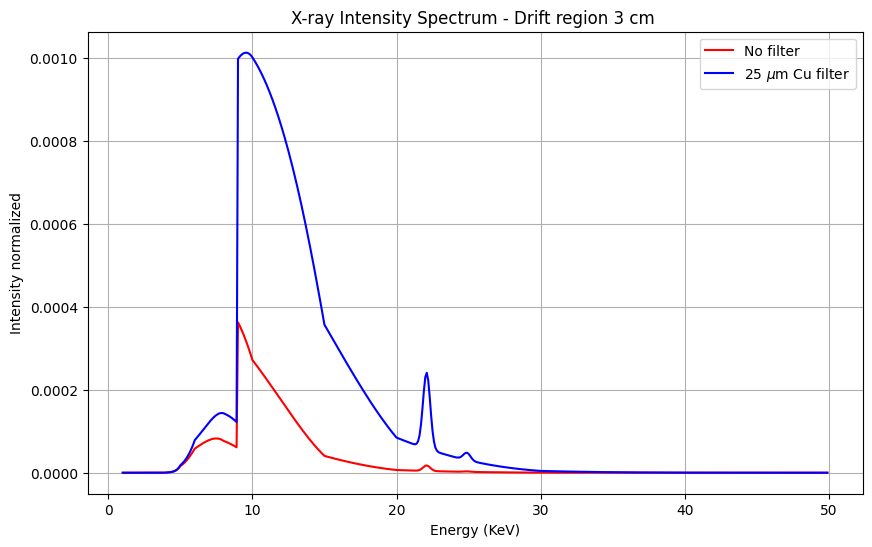

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(E*1e-3,Ik, label='No filter', color='red')
plt.plot(E*1e-3,Ik_copper, label=f'25 $\mu$m Cu filter', color='blue')
plt.xlabel('Energy (KeV)')
plt.ylabel('Intensity normalized')
plt.title(f'X-ray Intensity Spectrum - Drift region {D} cm ')
plt.legend()
plt.grid()
plt.show()

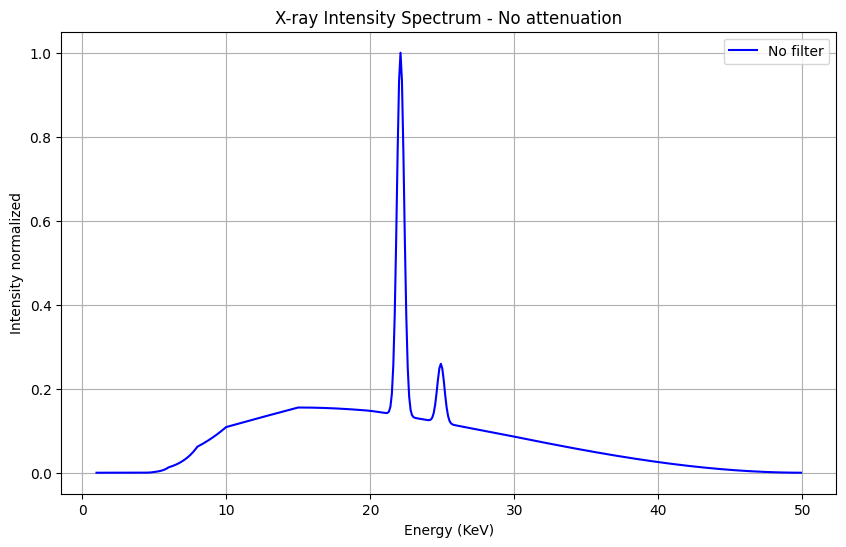

In [16]:
I_limpo = Intensity(E,50e3, sigma, kalpha, kbeta,amp = 2e12)*att_air
I_limpo = I_limpo/np.max(I_limpo)
plt.figure(figsize=(10, 6))
plt.plot(E*1e-3, I_limpo, label='No filter', color='blue')
plt.xlabel('Energy (KeV)')
plt.ylabel('Intensity normalized')
plt.title(f'X-ray Intensity Spectrum - No attenuation')
plt.legend()
plt.grid()
plt.show()

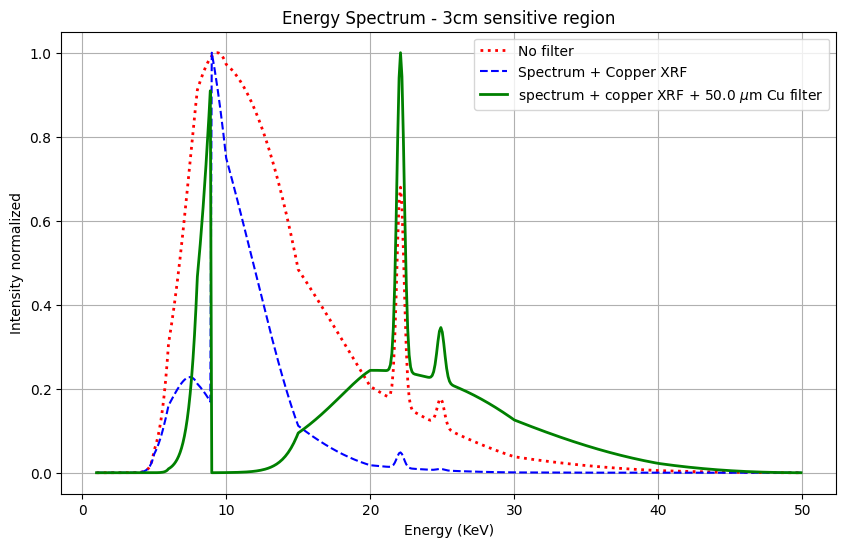

In [17]:
E = E = np.arange(1e3, 50e3, 100)
w = 0.433
a = 1/(mu_rho_interpolator(*read_xcom('attenuation_copper.txt'))(E*1e-6) * cu_density)**(-1) #attenuação do cobre
b = 1/(mu_rho_interpolator(*read_xcom('attenuation_copper.txt'))(8.05e-6) * cu_density)**(-1) #atenuação do cobre no pico de Kα
c = 1/(mu_rho_interpolator(*read_xcom('attenuation_argon.txt'))(E*1e-6) * argondensity)**(-1) #atenuação do argonio
d = 5e-4 #espessura do cobre em cm
D = 3 #cm
rho_l = {"air" : {'length': 100, 'density': 0.001225},
         "copper" : {'length': 50e-4, 'density': 8.96},
        "argon" : {'length': D, 'density': 0.00166}}

I = Intensity(E,50e3, sigma, kalpha, kbeta,amp = 1e12) #intensidade sem atenuação

att_air = attenuation(E*1e-6,mu_rho_interpolator(*read_xcom('attenuation.txt')), rho_l["air"]['density'], rho_l["air"]['length'])
att_copper = attenuation(E*1e-6,mu_rho_interpolator(*read_xcom('attenuation_copper.txt')),rho_l["copper"]['density'], rho_l["copper"]['length'])
att_argon = attenuation(E*1e-6,mu_rho_interpolator(*read_xcom('attenuation_argon.txt')),rho_l["argon"]['density'], rho_l["argon"]['length'])


I_limpo = I*att_air*(1-att_argon) #intensidade + ateunuação do ar + eficiência do argonio
norm = np.max(I_limpo)
I_norm = I_limpo/norm

Ik_copper = np.zeros(len(I)) #intensidade + ateunuação do ar + eficiência do argonio + fluorescência do cobre
for Ei in range(len(I)):
    Ik_copper[Ei] = 0.5*w*I_limpo[Ei]*quad(lambda theta: np.sin(theta)*(a[Ei]/(a[Ei] + b*np.cos(theta)))*(1 - np.exp(-d*(a[Ei] + b*np.cos(theta))))*(1- np.exp(-D*c[Ei]/np.cos(theta))), 0, np.pi/2)[0]
Ik_copper = Ik_copper/np.max(Ik_copper)


Ik_filtered = I_limpo*att_copper #intensidade + ateunuação do ar + eficiência do argonio + atenuação do cobre
Ik_2 = np.zeros(len(I))
for Ei in range(len(I)):
    Ik_2[Ei] = 0.5*w*Ik_filtered[Ei]*quad(lambda theta: np.sin(theta)*(a[Ei]/(a[Ei] + b*np.cos(theta)))*(1 - np.exp(-d*(a[Ei] + b*np.cos(theta))))*(1- np.exp(-D*c[Ei]/np.cos(theta))), 0, np.pi/2)[0]

Ik_2 = Ik_filtered/np.max(Ik_filtered)
cu_l = rho_l["copper"]['length']*1e4
plt.figure(figsize=(10, 6))
plt.plot(E*1e-3, I_norm, label='No filter', color='red',linestyle='dotted',linewidth=2)
plt.plot(E*1e-3, Ik_copper, label=f'Spectrum + Copper XRF', color='blue',linestyle='dashed')
plt.plot(E*1e-3, Ik_2, label=f'spectrum + copper XRF + { cu_l } $\mu$m Cu filter', color='green', linewidth=2) 
plt.xlabel('Energy (KeV)')
plt.ylabel('Intensity normalized')
plt.title(f'Energy Spectrum - 3cm sensitive region')
plt.legend()
plt.grid()
plt.show()

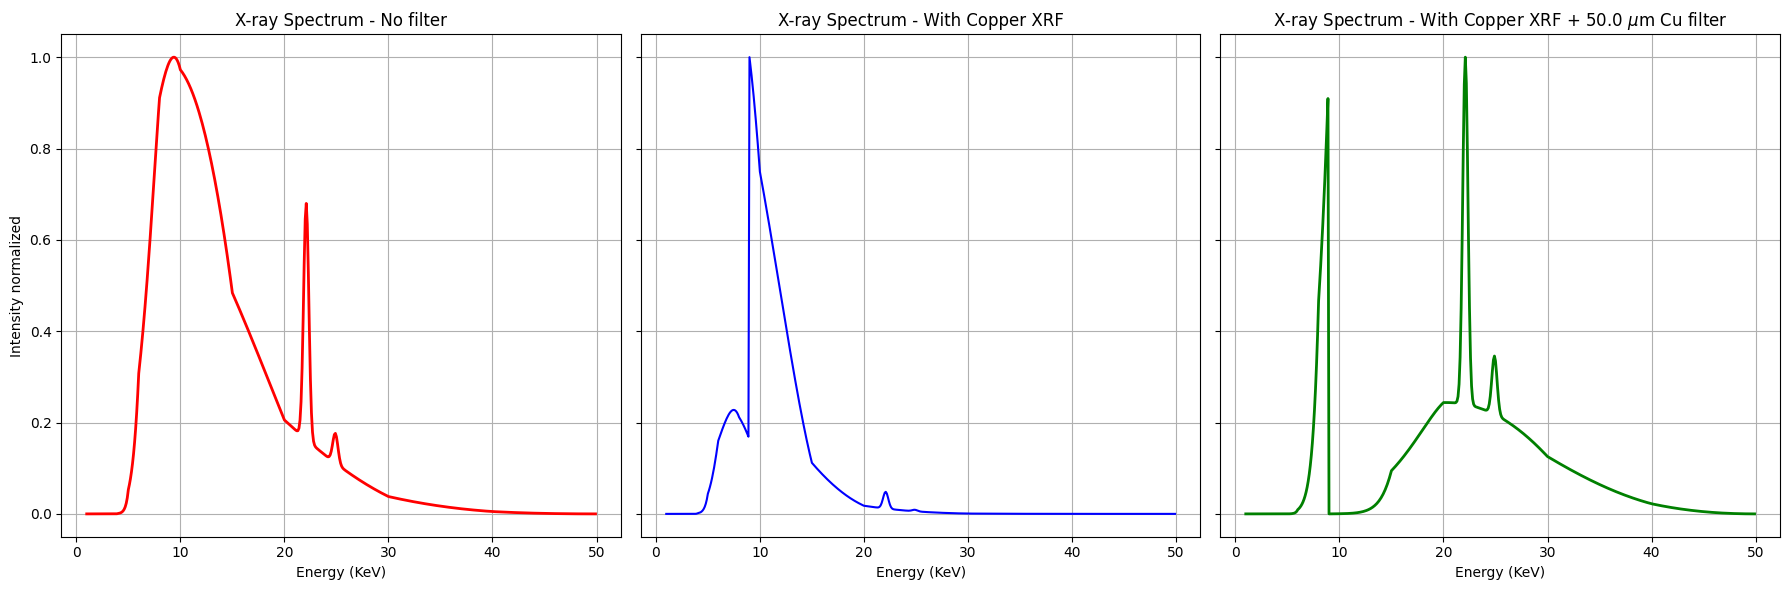

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
axs[0].plot(E*1e-3, I_norm, label='No filter', color='red',linewidth=2)
axs[0].set_ylabel('Intensity normalized')
axs[0].set_title('X-ray Spectrum - No filter')
axs[0].set_xlabel('Energy (KeV)')
axs[0].grid()

axs[1].plot(E*1e-3, Ik_copper, label='spectrum + Copper XRF', color='blue')
axs[1].set_xlabel('Energy (KeV)')
axs[1].set_title('X-ray Spectrum - With Copper XRF')
axs[1].grid()

axs[2].plot(E*1e-3, Ik_2, label=f'spectrum + copper XRF + { cu_l } $\mu$m Cu filter', color='green', linewidth=2)
axs[2].set_xlabel('Energy (KeV)')
axs[2].set_title(f'X-ray Spectrum - With Copper XRF + { cu_l } $\mu$m Cu filter')
axs[2].grid()

plt.tight_layout()
plt.show()
